# Build and validate a linear model

In this example we are going to build a linear regression model and validate it numerically and graphically.

The linear model between links a scalar variable $Y$ and to an n-dimensional one $\underline{X} = (X_i)_{i \leq n}$, as follows:

$$\tilde{Y} = a_0 + \sum_{i=1}^n a_i X_i + \varepsilon$$

where $\varepsilon$ is the residual, supposed to follow the Normal(0.0, 1.0) distribution.

The linear model may be validated graphically if $\underline{X}$ is of dimension 1, by drawing on the same graph the cloud $(X_i, Y_i).

The linear model also be validate numerically with several tests:

- LinearModelFisher: tests the nullity of the regression linear model coefficients (Fisher distribution used),
- LinearModelResidualMean: tests, under the hypothesis of a gaussian sample, if the mean of the residual is equal to zero. It is based on the Student test (equality of mean for two gaussian samples).


The hypothesis on the residuals (centered gaussian distribution) may be validated:

- graphically if $\underline{X}$ is of dimension 1, by drawing the residual couples ($\varepsilon_i, \varepsilon_{i+1}$), where the residual $\varepsilon_i$ is evaluated on the samples $(X, Y)$.
- numerically with the LinearModelResidualMean Test which tests, under the hypothesis of a gaussian sample, if the mean of the residual is equal to zero. It is based on the Student test (equality of mean for two gaussian samples).


In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Generate X,Y samples
N = 1000
Xsample = ot.Triangular(1.0, 5.0, 10.0).getSample(N)
Ysample = Xsample * 3.0 + ot.Normal(0.5, 1.0).getSample(N)

In [3]:
# Generate a particular scalar sampleX
particularXSample = ot.Triangular(1.0, 5.0, 10.0).getSample(N)

In [4]:
# Create the linear model from Y,X samples
result = ot.LinearModelAlgorithm(Xsample, Ysample).getResult()
linearRegressionModel = result.getTrendCoefficients()

# Get the coefficients ai
print("coefficients of the linear regression model = ", linearRegressionModel)

# Get the confidence intervals of the ai coefficients
print("confidence intervals of the coefficients = ", ot.LinearModelAnalysis(result).getCoefficientsConfidenceInterval())


coefficients of the linear regression model =  [0.592409,2.98159]
confidence intervals of the coefficients =  [0.435545, 0.749274]
[2.95382, 3.00935]


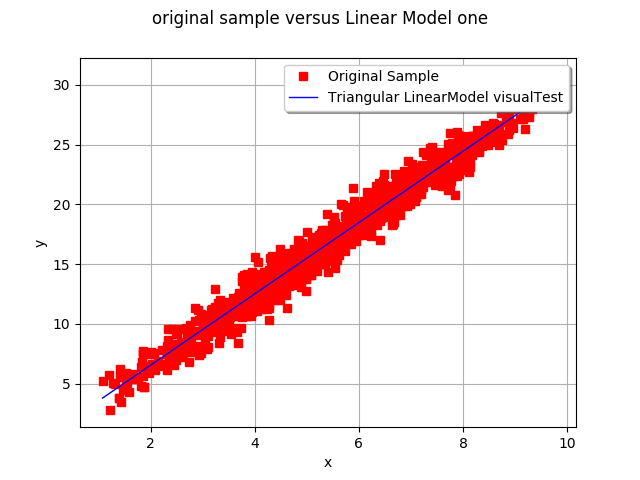

In [5]:
# Validate the model with a visual test
ot.VisualTest.DrawLinearModel(Xsample, Ysample, linearRegressionModel)

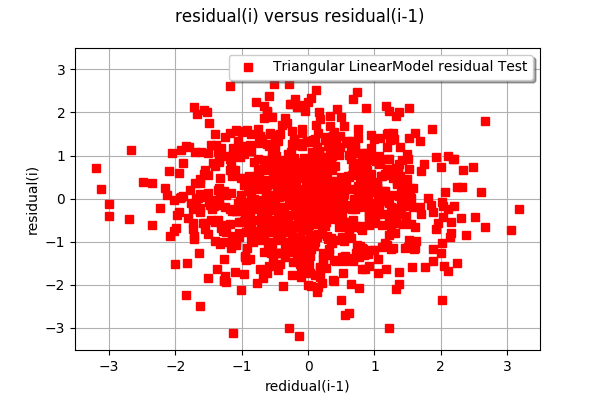

In [6]:
# Draw the graph of the residual values
ot.VisualTest.DrawLinearModelResidual(Xsample, Ysample, linearRegressionModel)

In [7]:
# Check the nullity of the regression linear model coefficients
resultLinearModelFisher = ot.LinearModelTest.LinearModelFisher(Xsample, Ysample, 
                                                               linearRegressionModel, 0.10)
print("Test Success ? ", resultLinearModelFisher.getBinaryQualityMeasure())
print("p-value of the LinearModelFisher Test = ", resultLinearModelFisher.getPValue())
print("p-value threshold = ", resultLinearModelFisher.getThreshold())

Test Success ?  False
p-value of the LinearModelFisher Test =  2.162231915736612e-08
p-value threshold =  0.1


In [8]:
# Check, under the hypothesis of a gaussian sample, if the mean of the residual is equal to zero
resultLinearModelResidualMean = ot.LinearModelTest.LinearModelResidualMean(Xsample, Ysample, 
                                                                           linearRegressionModel, 0.10)
print("Test Success ? ", resultLinearModelResidualMean.getBinaryQualityMeasure())
print("p-value of the LinearModelResidualMean Test = ", resultLinearModelResidualMean.getPValue())
print("p-value threshold = ", resultLinearModelResidualMean.getThreshold())

Test Success ?  True
p-value of the LinearModelResidualMean Test =  1.0000000000001557
p-value threshold =  0.1
